<a href="https://colab.research.google.com/github/JackCurragh/RDG-Viewer/blob/main/RDG_Viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDG-Viewer

Visualise Ribosome Decision Graphs in your browser using this colab notebook.

This notebook utilises the plotting functionality of the `RDG` python [package](https://github.com/JackCurragh/RDG). This package is under active development with the goal of being a basic toolkit for carrying out Ribosome Decision Graph based analysis.

In [1]:
#@title 1. Setup

#@markdown Install the required dependencies for Ribosome Decision Graph
#@markdown visualisation

#@markdown Run this step by clicking the <b>Play</b> button on the left

!pip install -q sqlitedict matplotlib networkx gget;
!pip install -q git+https://github.com/JackCurragh/RDG.git;

from RDG import plot, RDG

no_node_color_dict = {
    "edge_colors": {
        0: "#ffbb8d",
        1: "#ffeedd",
        2: "#ffd8be"
        },
    "node_colors": {
        "startpoint": "#000000",
        "endpoint": "#000000",
        "translation_start": "#00b050",
        "translation_stop": "#000000",
        "frameshift": "#000000",
    },
}

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.0/334.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

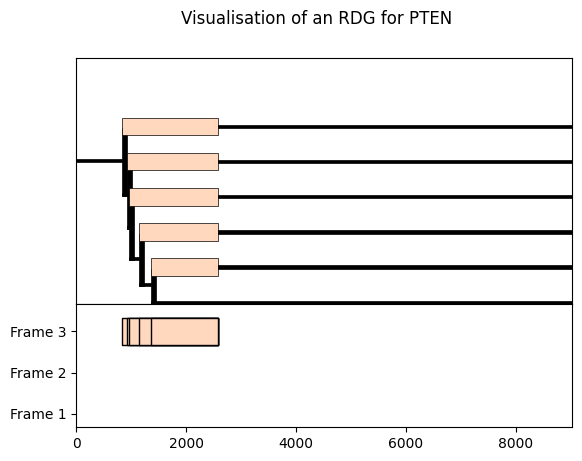

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [2]:
#@title 2. Build & Visualise Ribosome Decsion Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "PTEN"  #@param {type:"string"}
Transcript_length = 9027 #@param {type:"integer"}

Allow_reinitiation = False #@param {type:"boolean"}

#@markdown Input Translon start and stop coordinates in the form
#@markdown "Start Position, Stop Position". Example  `100, 500`

#@markdown Leave a field blank if you do not require all 5 Translons

#@markdown <b>Note:</b> the quotation marks look after themselves
Translon_1 = "1358, 2570"  #@param {type:"string"}
Translon_2 = "839, 2570"  #@param {type:"string"}
Translon_3 = "920, 2570"  #@param {type:"string"}
Translon_4 = "965, 2570"  #@param {type:"string"}
Translon_5 = "1142, 2570"  #@param {type:"string"}

Translons = {
    "Translon 1": Translon_1,
    "Translon 2": Translon_2,
    "Translon 3": Translon_3,
    "Translon 4": Translon_4,
    "Translon 5": Translon_5,
    }

g = RDG(name=Locus_Name, locus_stop=Transcript_length)


for translon in Translons:
  if Translons[translon] != "":
    try:
      start_stop = [int(i) for i in Translons[translon].split(", ")]
    except:
      raise Exception("Translon 1 Start or Stop Codon position is invalid")

    g.add_open_reading_frame(
        start_codon_position=int(start_stop[0]),
        stop_codon_position=int(start_stop[1]),
        reinitiation=Allow_reinitiation
        )

plot(g, color_dict=no_node_color_dict)

In [6]:
#@title 2 v2. Build Visualise Ribosome Decsion Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "ATF4"  #@param {type:"string"}
Transcript_length = 3000 #@param {type:"integer"}

Allow_reinitiation = False #@param {type:"boolean"}
#@markdown Distance after a stop required for reinitiation to be possible
Reinitiation_base_limit = 300 #@param {type:"integer"}

import ipywidgets as widgets

t1 = widgets.FloatRangeSlider(
    value=[486, 649],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t2 = widgets.FloatRangeSlider(
    value=[700, 891],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t3 = widgets.FloatRangeSlider(
    value=[888, 1943],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t4 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 4:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t5 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 5:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
display(t1, t2, t3, t4, t5)


FloatRangeSlider(value=(486.0, 649.0), continuous_update=False, description='Translon 1:', layout=Layout(heigh…

FloatRangeSlider(value=(700.0, 891.0), continuous_update=False, description='Translon 2:', layout=Layout(heigh…

FloatRangeSlider(value=(888.0, 1943.0), continuous_update=False, description='Translon 3:', layout=Layout(heig…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 4:', layout=Layout(height='4…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 5:', layout=Layout(height='4…

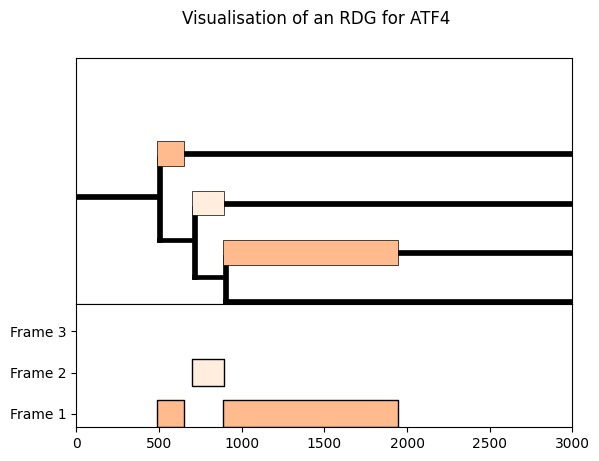

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [7]:
#@title Once you have set your Translon ranges it <b>Play</b> to render the graph!

Translons = {
    "Translon 1": t1.value,
    "Translon 2": t2.value,
    "Translon 3": t3.value,
    "Translon 4": t4.value,
    "Translon 5": t5.value,
    }

g = RDG(name=Locus_Name, locus_stop=Transcript_length)

for translon in Translons:
  if Translons[translon][0] != Translons[translon][1]:
    g.add_open_reading_frame(
        start_codon_position=int(Translons[translon][0]),
        stop_codon_position=int(Translons[translon][1]),
        reinitiation=Allow_reinitiation,
        )
plot(g, color_dict=no_node_color_dict, reinit_base_limit=Reinitiation_base_limit)

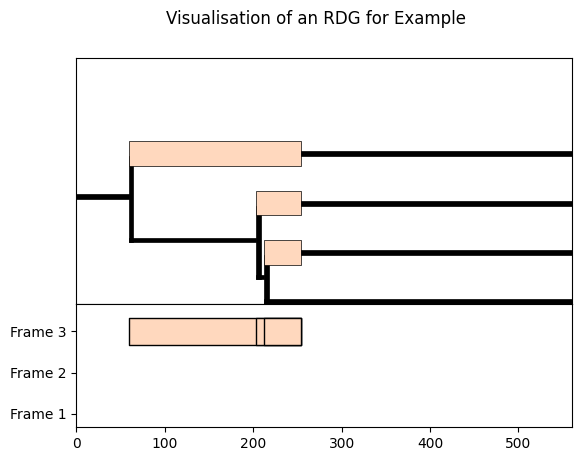

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [9]:
#@title 3. Build Visualise Ribosome Decsion Graph - From Sequence

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Provide transcript sequence and specified graph construction
#@markdown paramaters below:

from RDG.sequence_to_RDG import extract_translons

Locus_Name = "Example"  #@param {type:"string"}

#@markdown Transcript Sequence (No FASTA Header):
sequence = "ACTGCGCCCTCGGTCCGCCCCAGATCATCCGCCAGCTGGAGAACAACATCGAGAAGACAATGATCAAGATCATCACCAGCCAGAACATCCACCTGCTGTATTTGGACCTGCTGGATTATCTGAAGACAGTGCTGGCAGGATACCCCATTGAGCTGGACAAGCTGCAGAACCTCGTGGTCAACTACTGCTCAGAGCTGTCGGATATGAAGATCATGTCCCAAGATGCCATGATGATCACGGATGAGGTCAAGTGAAGATAGTGATCCGGGGAGACAGGAACACGGGCAAGACAGCGCTGTGGCACCGCCTGCAGGGCCGGCCGTTCGTGGAGGAGTACATCCCCACACAGGAGATCCAGGTCACCAGCATCCACTGGAGCTACAAGACCACGGATGACATCGTGAAGGTTGAAGTCTGGGATGTAGTAGACAAAGGAAAATGCAAAAAGCGAGGCGACGGCTTAAAGATGGAGAACGACCCCCAGGAGGCGGAGTCTGAAATGGCCCTGGATGCTGAGTTCCTGGACGTGTACAAGAACTGCAACGGGGTGGTCATGATGTT" #@param {type:"string"}

#@markdown Start Codons to Consider:
start_codons = "ATG" #@param {type:"string"}

#@markdown Number of Start Codons at which the Ribosome will initiate:
Number_of_Starts = 3 #@param {type:"integer"}

#@markdown Max number of Translons on reinitiation path
reinitiation_limit = 7 #@param {type:"integer"}
Allow_reinitiation = True #@param {type:"boolean"}

translons = extract_translons(sequence, starts=start_codons, min_length=0)
dg = RDG(name=Locus_Name, locus_stop=len(sequence))

for translon_start, translon_stop in sorted(translons)[:Number_of_Starts]:
    dg.add_open_reading_frame(
        translon_start,
        translon_stop,
        reinitiation=Allow_reinitiation,
        upstream_limit=reinitiation_limit,
    )

plot(dg, color_dict=no_node_color_dict)

['>ENST00000404241 chromosome:GRCh38:22:39519695:39522683:1', 'AGGTGGACAGGCCCGGCGCGCCCTCTCGAGGCCCCTTCAACCTCCCGGGGGCAGCAGCGCCGTGTCGGCTATGAATGGGGCCTCTGGAAAACTCAGGCTTGGAACAGGTAACCCCCCGGTTTCCGCAGGCCACAAATCACCACCCGCAACCGAAGGACGCGCAGGCTGGGAGCGGCGGCGGGGCCACCAGTGCGGACCTCCACTGAGGGCGGCGGGATCCGACCGCAAGGGCTGGTCCCTGAGGCCACTAAGGGGTGCGCTGGGCTAAGGCCGCCTGGGGGCAGGAGCCAGCGCGATCGTGGCGGGCCAGCAGGCGGGGCTGGCTGAGGACTAGCAGCGACCCGAGACCCCAACCCTTCCCACGCGGACCCCGGGATCCCTCTCCCAGCAGCCGCCCATCTAGGGCCCTGAGCCAATAAGAGCTCGAGATATATATGATTCACCGGGCCTGGGCCAATCACCTTGACGCGCGCTCTTCGCCAGCACCTCGCGCGATAACCTGGCGTCCTCGGCCTTCACAATAAAAACTCTTCGCCGGAAAACGACCTTTCCCCGCCCACTGCGCTGACACCGGAAGCGAGGCGTGTCTGGGAGATCACTCCGCGCTCCGGCGGCGAAGGAAAGAACGGACTCTGATCATAGAAGCCTAGTAAAGTAGTACACCTCTCTCCTTTCGTGAGGCCATAAGAACAAACTCCTTTTCTCGTCACAGCTACGCCCTGGGCATAAACGGTTGGGGCGTCAAAGGGAGGGAGGGAAGGGAGCGGGCGGGAGGAGACGGTCACGTGGTCGCGGCGGAAGGATGCGTCTGTGCTGCGTCCCCATAGAGACGAAGTCTATAAAGGGCCGGCGGGCGGCCACGGCAGCCATTTCTACTTTGCCCGCCCACAGATGTAGTTTTCTCTGCGCGTGTGCGTTTTCCCTCCTCCCCGCCCTC

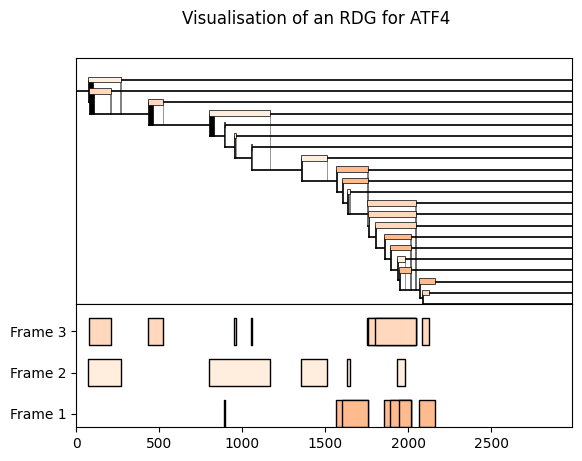

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [15]:
#@title 4. Build Visualise Ribosome Decsion Graph - From Gene Name

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Provide gene name and specified graph construction
#@markdown paramaters below:
import gget

organism = "homo_sapiens" #@param {type:"string"}
#@markdown <b>Please provide the organism name with an underscore eg "mus_musculus"</b>

gene_name = "ATF4" #@param {type:"string"}

#@markdown Start Codons to Consider:
start_codons = "ATG" #@param {type:"string"}

#@markdown Number of Start Codons at which the Ribosome will initiate:
Number_of_Starts = 20 #@param {type:"integer"}

#@markdown Max number of Translons on reinitiation path
reinitiation_limit = 7 #@param {type:"integer"}
Allow_reinitiation = True #@param {type:"boolean"}


ensg = gget.search([gene_name], organism)['ensembl_id'][0]
print(gget.seq(ensg, translate=False, isoforms=True))
gget_sequence = gget.seq(ensg, translate=False, isoforms=True)[1]

translons = extract_translons(gget_sequence, starts=start_codons, min_length=0)
dg = RDG(name=gene_name, locus_stop=len(gget_sequence))

for translon_start, translon_stop in sorted(translons)[:Number_of_Starts]:
    dg.add_open_reading_frame(
        translon_start,
        translon_stop,
        reinitiation=Allow_reinitiation,
        upstream_limit=reinitiation_limit,
    )
plot(dg, color_dict=no_node_color_dict)